1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [1]:
import pandas as pd

file_path = '2023_6/open_rank_20236.csv'
data = pd.read_csv(file_path)

top_100_projects = data[data['rank'] <= 100]

value_max = top_100_projects['value'].max()
value_min = top_100_projects['value'].min()
value_mean = top_100_projects['value'].mean()
value_median = top_100_projects['value'].median()

print("最大值:", value_max)
print("最小值:", value_min)
print("均值:", value_mean)
print("中位数:", value_median)


最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [4]:
file_path='2022/activity_2022.csv'
data_2022=pd.read_csv(file_path)
top_10_projects_2022=data_2022.head(10)

growth_rates = []

for index, row in top_10_projects_2022.iterrows():
    monthly_values = row[1:].values
    monthly_growth = [(monthly_values[i+1] - monthly_values[i]) / monthly_values[i] for i in range(len(monthly_values) - 1)]
    average_growth = sum(monthly_growth) / len(monthly_growth)
    growth_rates.append(average_growth)

average_growth_rate_top_10 = sum(growth_rates) / len(growth_rates)
print("平均增长率:", average_growth_rate_top_10)


平均增长率: 0.012502691855077125


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [5]:
import pandas as pd

china_file_path = '2022/china_2022.csv'  
global_file_path = '2022/global_2022.csv'

china_data = pd.read_csv(china_file_path)
global_data = pd.read_csv(global_file_path)

china_stats = china_data.describe().T
global_stats = global_data.describe().T

print("中国开源企业统计数据:")
print(china_stats)

print("\n全球开源企业统计数据:")
print(global_stats)


中国开源企业统计数据:
                count       mean           std       min         25%  \
issue_comment    10.0  61205.500  49332.487917  11741.00  30943.5000   
open_issue       10.0   9169.200   6810.653563    752.00   4625.2500   
open_pull        10.0  16912.700  10068.922805   1823.00   9376.7500   
review_comment   10.0  19857.500  21115.073490   2113.00   3120.0000   
merged_pull      10.0  13764.100   7692.752064   1165.00   8067.2500   
rank             10.0      5.500      3.027650      1.00      3.2500   
value            10.0  40269.534  30905.171810  12033.71  15161.0375   
rankDelta        10.0      5.300      9.944848      0.00      0.0000   
valueDelta       10.0   9265.007   5327.824003   2329.36   5268.9475   

                      50%         75%        max  
issue_comment   39141.000  82179.5000  167814.00  
open_issue       6889.500  14225.5000   22397.00  
open_pull       15953.000  22483.2500   35266.00  
review_comment  10851.000  31507.7500   60402.00  
merged_pull 

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [6]:
# 给定的概率
P_A = 0.25  # 非软件类项目的比例
P_B_given_A = 0.85  # 在非软件类项目中带有 HTML/Markdown 标签的项目比例
P_not_A = 0.75  # 软件类项目的比例
P_B_given_not_A = 0.10  # 在软件类项目中带有 HTML/Markdown 标签的项目比例

# 计算 P(B)，即带有 HTML/Markdown 标签的项目的总体概率
P_B = P_B_given_A * P_A + P_B_given_not_A * P_not_A

# 计算 P(A|B)，即在已知带有 HTML/Markdown 标签的情况下，项目为非软件类项目的概率
P_A_given_B = (P_B_given_A * P_A) / P_B

print("在带有 HTML/Markdown 标签的情况下，项目为非软件类项目的概率:", P_A_given_B)


在带有 HTML/Markdown 标签的情况下，项目为非软件类项目的概率: 0.7391304347826088


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [7]:
# 给定的概率
P_C = 0.50  # 工具组件型项目的比例
P_D_given_C = 0.35  # 在工具组件型项目中由 JavaScript 语言编写的项目比例
P_not_C = 0.50  # 非工具组件型项目的比例
P_D_given_not_C = 0.10  # 在非工具组件型项目中由 JavaScript 语言编写的项目比例

# 计算 P(D)，即由 JavaScript 语言编写的项目的总体概率
P_D = P_D_given_C * P_C + P_D_given_not_C * P_not_C

# 计算 P(C|D)，即在已知项目由 JavaScript 语言编写的情况下，该项目为工具组件型项目的概率
P_C_given_D = (P_D_given_C * P_C) / P_D

print("在由 JavaScript 语言编写的情况下，项目为工具组件型项目的概率:", P_C_given_D)


在由 JavaScript 语言编写的情况下，项目为工具组件型项目的概率: 0.7777777777777778


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

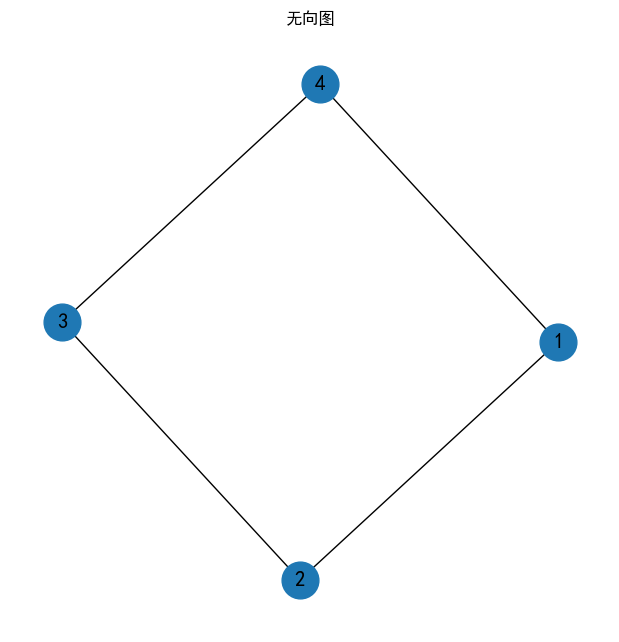

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edge)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_size=700, font_size=15, font_weight='bold')
plt.title("无向图")
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

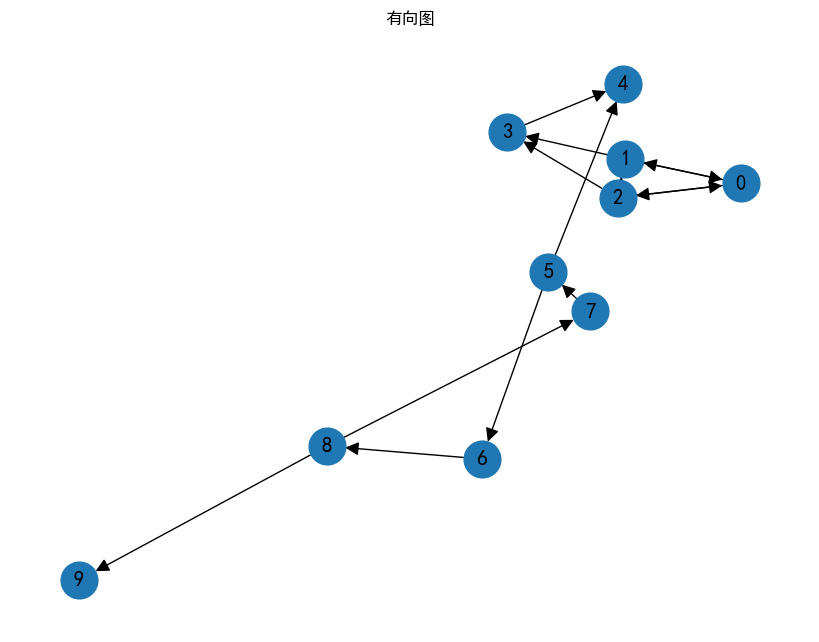

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # 使用 spring 布局
nx.draw(G, pos, with_labels=True, node_size=700, font_size=15, font_weight='bold', arrowsize=20)
plt.title("有向图")
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

PageRank 值:
节点 0: 0.0950
节点 1: 0.1055
节点 2: 0.1055
节点 3: 0.0950
节点 4: 0.1593
节点 5: 0.1020
节点 6: 0.0786
节点 7: 0.0786
节点 8: 0.1020
节点 9: 0.0786


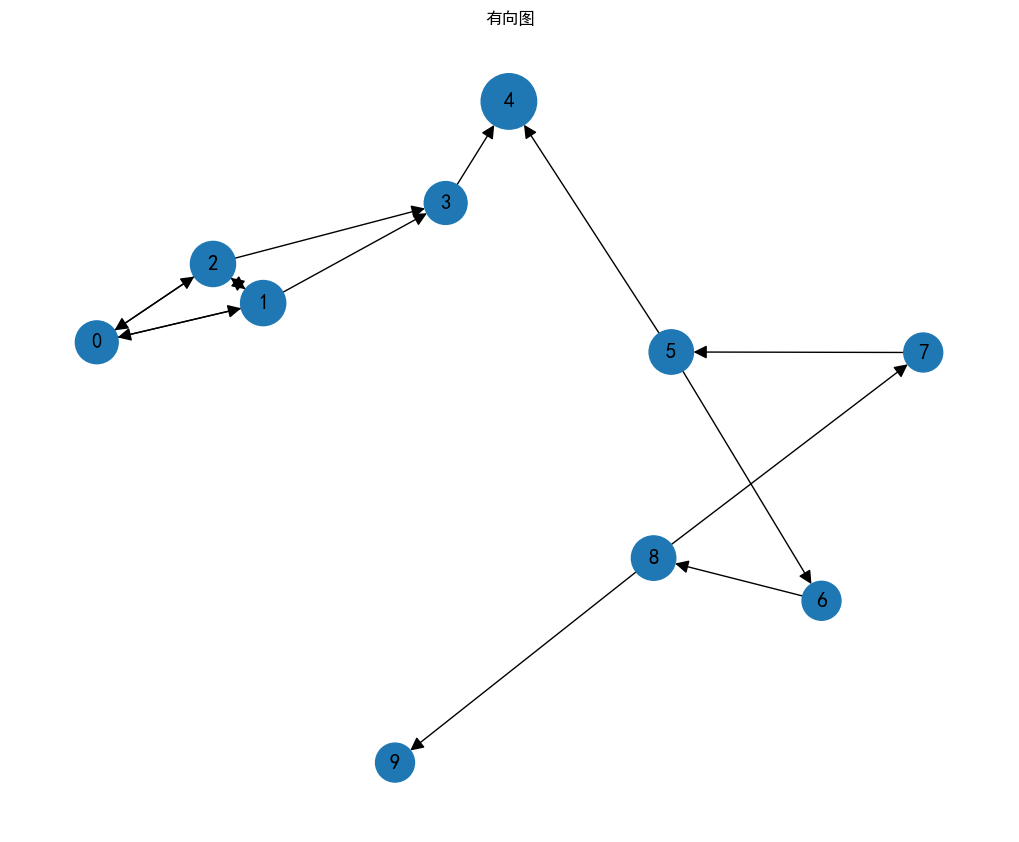

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

pagerank = nx.pagerank(G)

print("PageRank 值:")
for node, rank in pagerank.items():
    print(f"节点 {node}: {rank:.4f}")

node_size = [v * 10000 for v in pagerank.values()]

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # 使用 spring 布局
nx.draw(G, pos, with_labels=True, node_size=node_size, font_size=15, font_weight='bold', arrowsize=20)
plt.title("有向图")
plt.show()